In [243]:
import pandas as pd
import numpy as np

In [244]:
## Differential Amplifier Analsysis and C/ID Plots

In [245]:
## Importing all the relevant files from cadence characterization

kcgd_n = pd.read_csv("kcgd_n_diffamp.csv")
kcgs_n = pd.read_csv("kcgs_n_diffamp.csv")
kcsg_p = pd.read_csv("kcsg_p_diffamp.csv")
kgm_n = pd.read_csv("kgmn_diffamp.csv")
kgm_p = pd.read_csv("kgmp_diffamp.csv") 
kgds_n = pd.read_csv("kgds_n_diffamp.csv")
kgds_p = pd.read_csv("kgds_p_diffamp.csv")

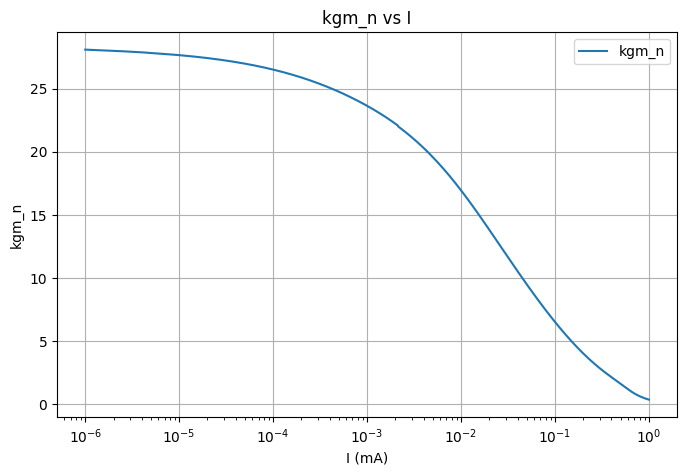

In [246]:
## Plotting kgm_n

import matplotlib.pyplot as plt

ids = kgm_n['kgmn X']*1e3
kgm_n = kgm_n['kgmn Y']

plt.figure(figsize=(8, 5))
plt.plot(ids, kgm_n, label='kgm_n')
plt.xscale('log')
plt.xlabel('I (mA)')
plt.ylabel('kgm_n')
plt.title('kgm_n vs I')
plt.legend()
plt.grid(True)
plt.show()

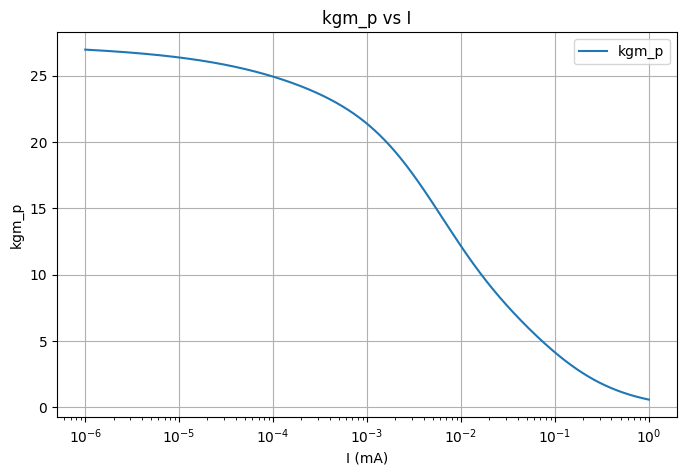

In [247]:
## Plotting kgm_p

kgm_p = kgm_p['kgmp Y']
kgm_p = np.abs(kgm_p)
plt.figure(figsize=(8, 5))
plt.plot(ids, np.abs(kgm_p), label='kgm_p')
plt.xscale('log')
plt.xlabel('I (mA)')
plt.ylabel('kgm_p')
plt.title('kgm_p vs I')
plt.legend()
plt.grid(True)
plt.show()

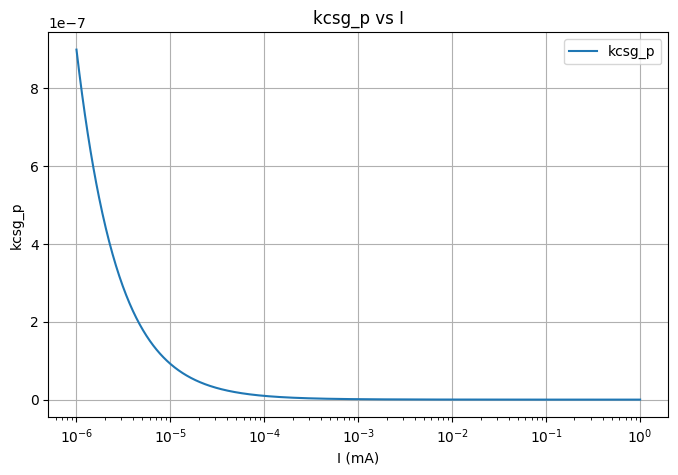

In [248]:
## Plotting kcsg_p

kcsg_p = kcsg_p['kcsg_p Y']

plt.figure(figsize=(8, 5))
plt.plot(ids, np.abs(kcsg_p), label='kcsg_p')
plt.xscale('log')
plt.xlabel('I (mA)')
plt.ylabel('kcsg_p')
plt.title('kcsg_p vs I')
plt.legend()
plt.grid(True)
plt.show()

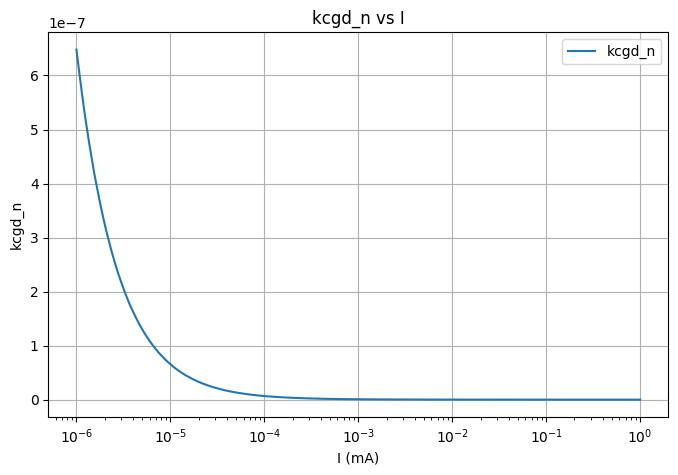

In [249]:
## Plotting kcgd_n

kcgd_n = kcgd_n['kcgd_n Y']
kcgd_n = np.abs(kcgd_n)

plt.figure(figsize=(8, 5))
plt.plot(ids, kcgd_n, label='kcgd_n')
plt.xscale('log')
plt.xlabel('I (mA)')
plt.ylabel('kcgd_n')
plt.title('kcgd_n vs I')
plt.legend()
plt.grid(True)
plt.show()

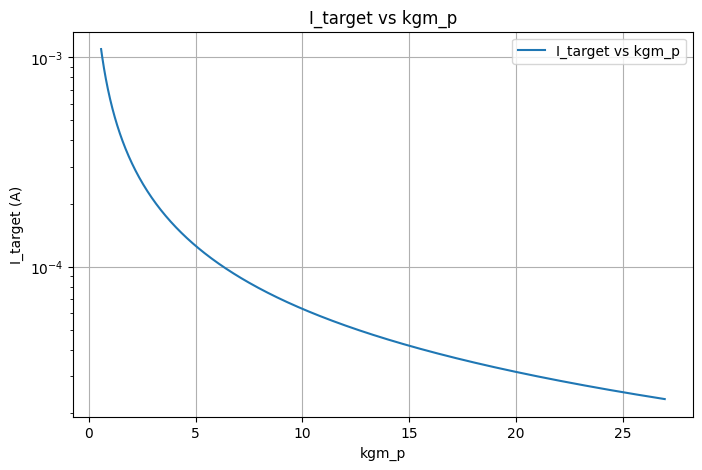

In [250]:
## Plotting the kgm vs I for target f_bw

f_bw = 2e6 # 2MHz

C_L = 50e-12 # 50pF

I_target = 2 * np.pi * f_bw * C_L / (kgm_p - (kcgd_n + kcsg_p))

plt.figure(figsize=(8, 5))
plt.plot(kgm_p, I_target, label='I_target vs kgm_p')
plt.yscale('log')
plt.ylabel('I_target (A)')
plt.xlabel('kgm_p')
plt.title('I_target vs kgm_p')
plt.legend()
plt.grid(True)
plt.show()

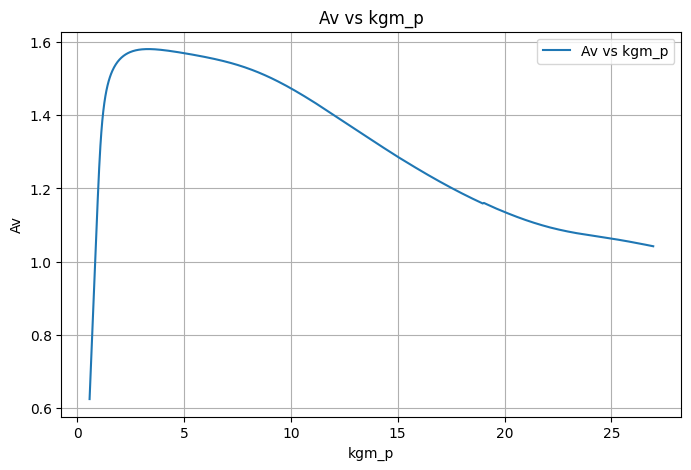

In [251]:
## Plotting Gain as a function of kgm_p

Av = kgm_n/kgm_p

plt.figure(figsize=(8, 5))
plt.plot(kgm_p, Av, label='Av vs kgm_p')
# plt.yscale('log')
plt.ylabel('Av')
plt.xlabel('kgm_p')
plt.title('Av vs kgm_p')
plt.legend()
plt.grid(True)
plt.show()

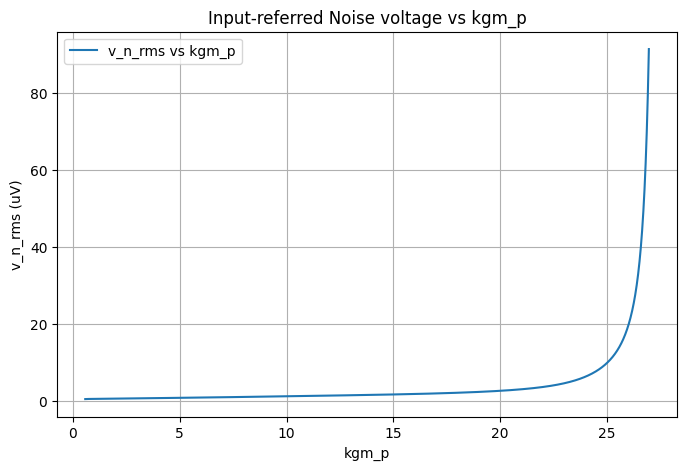

In [252]:
## Noise estimation

NBW_factor = 5 # Assumption
kT = 1.38e-23 * 300
Gamma = 2/3

k_noise = 4*kT*Gamma*NBW_factor

v_n_rms = np.sqrt(k_noise * f_bw * (kgm_n + kgm_p)/(kgm_p*kgm_p*ids))

plt.figure(figsize=(8, 5))
plt.plot(kgm_p, v_n_rms*1e6, label='v_n_rms vs kgm_p')
plt.xlabel('kgm_p')
plt.ylabel('v_n_rms (uV)')
plt.title('Input-referred Noise voltage vs kgm_p')
plt.legend()
plt.grid(True)
plt.show()

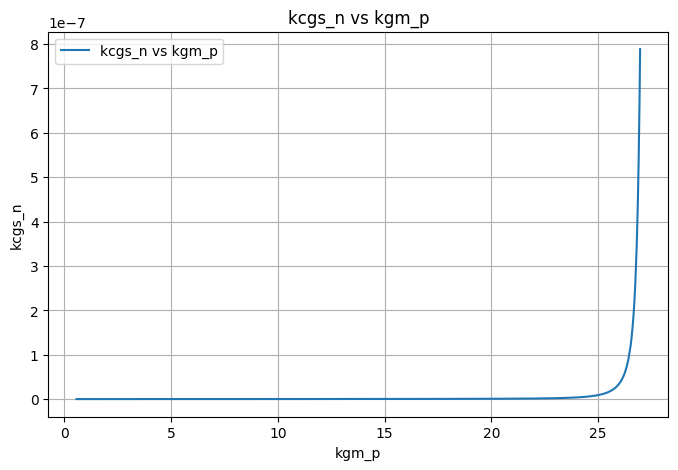

In [253]:
kcgs_n = np.abs(kcgs_n['kcgs_n Y'])

plt.figure(figsize=(8, 5))
plt.plot(kgm_p, kcgs_n, label='kcgs_n vs kgm_p')
plt.xlabel('kgm_p')
plt.ylabel('kcgs_n')
plt.title('kcgs_n vs kgm_p')
plt.legend()
plt.grid(True)
plt.show()

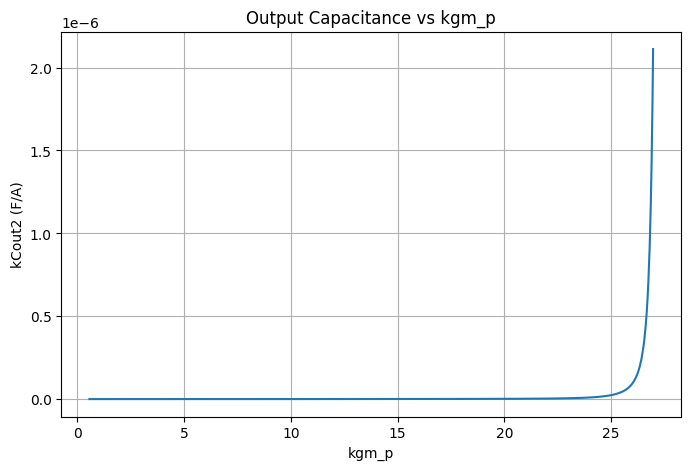

In [254]:
## Plotting Cout2 vs kgm_p

kcout_2 = (kcgs_n + (Av + 1) * kcgd_n)

plt.figure(figsize=(8, 5))
plt.plot(kgm_p, kcout_2, label='kCout2 vs kgm_p')
plt.xlabel('kgm_p')
plt.ylabel('kCout2 (F/A)')
plt.title('Output Capacitance vs kgm_p')
plt.grid(True)
plt.show()

In [255]:
## Reading out values at a certain kgm_p point

kgm_p_target = 10

I_target_index = (np.abs(kgm_p - kgm_p_target)).idxmin()
print(f"At kgm_p = {kgm_p_target} S, I = {I_target[I_target_index]:.2e} A, Av = {Av[I_target_index]:.2f}, v_n_rms = {v_n_rms[I_target_index]*1e6:.2f} uV, kCout2 = {kcout_2[I_target_index]:.2e} F/A")

cout_2 = I_target[I_target_index]*kcout_2[I_target_index]
print(f"At kgm_p = {kgm_p_target} S, Cout2 = {cout_2*1e12:.3f} pF")

At kgm_p = 10 S, I = 6.28e-05 A, Av = 1.47, v_n_rms = 1.29 uV, kCout2 = 2.16e-10 F/A
At kgm_p = 10 S, Cout2 = 0.014 pF


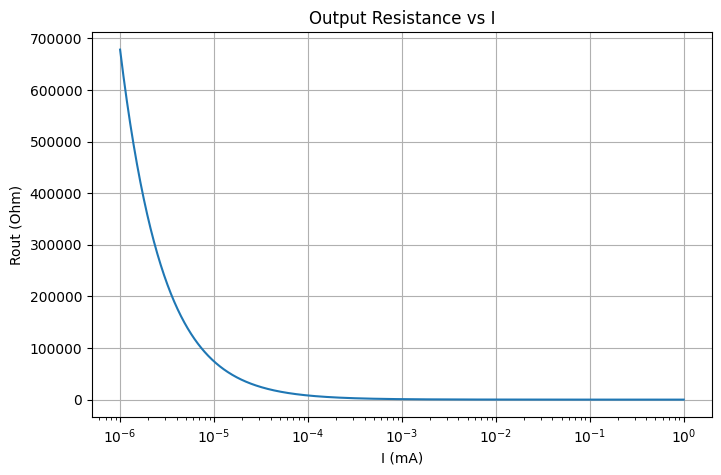

In [256]:
## Plotting Rout as a function of I 

kgds_n = kgds_n['kgds_n Y']
kgds_p = kgds_p['kgds_p Y']

k_gds_eff = kgds_n + np.abs(kgds_p)
rout_eff = 1/(ids*k_gds_eff)
plt.figure(figsize=(8, 5))
plt.plot(ids, rout_eff, label='Rout vs I')
plt.xlabel('I (mA)')
plt.ylabel('Rout (Ohm)')
plt.xscale('log')
plt.title('Output Resistance vs I')
plt.grid(True)
plt.show()

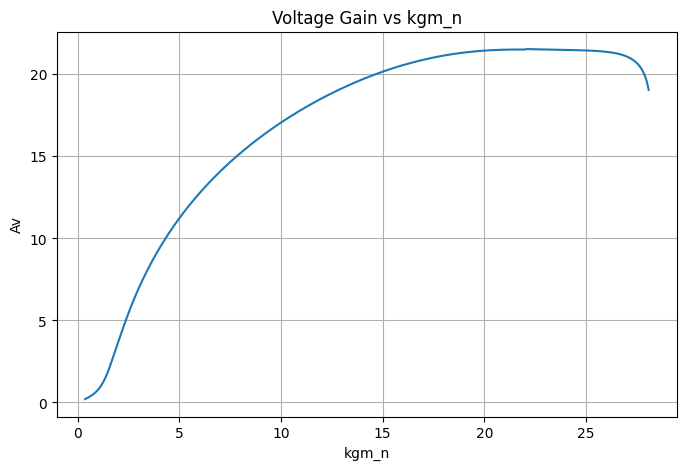

In [257]:
## Gain plot

Av_eff = kgm_n/k_gds_eff

plt.figure(figsize=(8, 5))
plt.plot(kgm_n, Av_eff, label='Av vs kgm')
# plt.xscale('log')
plt.xlabel('kgm_n')
plt.ylabel('Av')
plt.title('Voltage Gain vs kgm_n')
plt.grid(True)
plt.show()

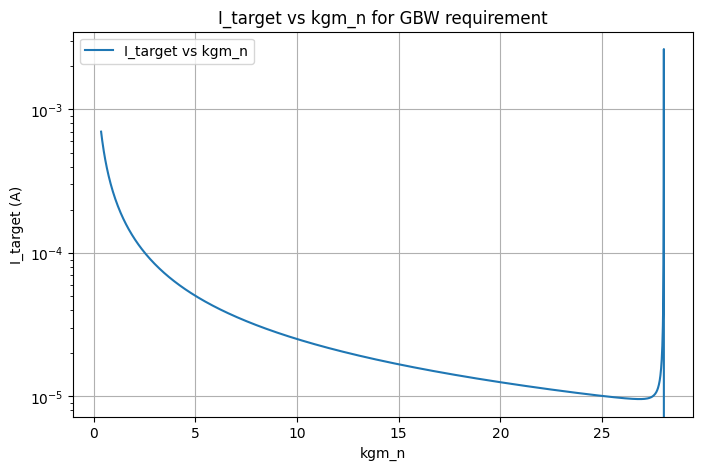

In [258]:
## GBW requirements

GBW = 2*2e6
C_L = 10e-12

I_target = (2*np.pi*GBW*C_L)/(kgm_n - (2*np.pi*GBW*(kcgd_n + kcsg_p)))

plt.figure(figsize=(8, 5))
plt.plot(kgm_n, I_target, label='I_target vs kgm_n')
plt.yscale('log')
plt.xlabel('kgm_n')
plt.ylabel('I_target (A)')
plt.title('I_target vs kgm_n for GBW requirement')
plt.legend()
plt.grid(True)
plt.show()

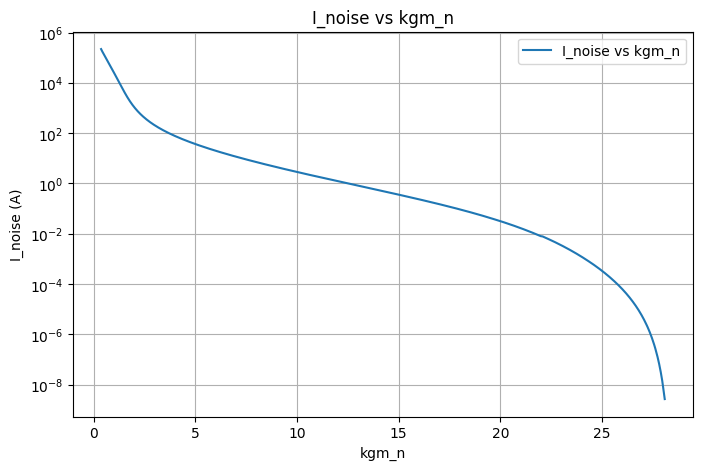

In [259]:
## Rewriting the noise equations with Reff

v_n_rms_target_total = 150e-6
v_n_rms_target_stage1 = v_n_rms_target_total / np.sqrt(3)

PSD_target_stage1 = v_n_rms_target_stage1**2 / (f_bw * NBW_factor)
I_noise = PSD_target_stage1/(4*kT*Gamma*(kgm_p+kgm_n)*rout_eff*rout_eff)

plt.figure(figsize=(8, 5))
plt.plot(kgm_n, I_noise, label='I_noise vs kgm_n')
plt.xlabel('kgm_n')
plt.yscale('log')
plt.ylabel('I_noise (A)')
plt.title('I_noise vs kgm_n')
plt.legend()
plt.grid(True)
plt.show()